In [1]:
import pandas as pd

from bengrn import get_GT_db, get_perturb_gt, get_sroy_gt, BenGRN

%load_ext autoreload
%autoreload 2


💡 connected lamindb: jkobject/scprint


In [3]:
#SROY
sroy = get_sroy_gt(get="han")
sroy.var['symbol'] = sroy.var.index
#OMNIPATH
#omni = get_GT_db('omnipath')
#GWPS
gwps = get_perturb_gt('gwps')
gwps.var['symbol'] = gwps.var.gene_name

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/ml4ig1/Documents code/benGRN/bengrn/base.py:546: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  :, pert.columns.isin(adata_sc.var.index)


KeyboardInterrupt: 

loading GT,  omnipath
intersection of 5421 genes
intersection pct: 0.7261888814467515
precision:  0.033108426172916997 
recall:  0.009348485855430761 
random precision: 0.0015363581970075373


 98%|█████████▊| 126/128 [00:07<00:00, 17.62it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:752: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 128/128 [00:07<00:00, 17.61it/s]


Area Under Precision-Recall Curve (AUPRC):  0.018626541195898072
EPR: 6.270824855528782


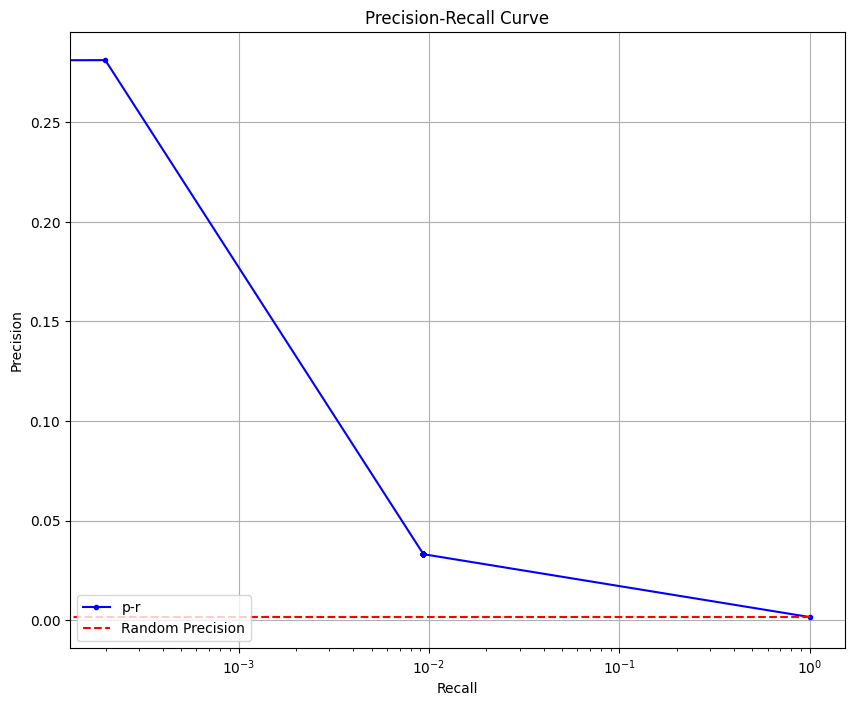

{'precision': 0.033108426172916997,
 'recall': 0.009348485855430761,
 'rand_precision': 0.0015363581970075373,
 'auprc': 0.018626541195898072,
 'epr': 6.270824855528782}

In [6]:
# using the transpose here makes it worse (2.1, 0.0088)
# using the sum of transpose and normal helps somehow but likely for the bad reason as it provides another possible cutoff (bi connection) where the EPR is really high
sroy.varp['GRN'] = sroy.varp['GRN'].T + sroy.varp['GRN']
BenGRN(sroy).compare_to(to="omnipath")

loading GT,  omnipath
intersection of 10683 genes
intersection pct: 0.44633382076457073
precision:  0.04466658231051499 
recall:  0.0031546023235031278 
random precision: 0.0009805828300419664


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:675: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
 48%|████▊     | 48/99 [00:11<00:11,  4.34it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:681: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:23<00:00,  4.26it/s]


Area Under Precision-Recall Curve (AUPRC):  0.02282203589584146
EPR: 3.2495463312943467


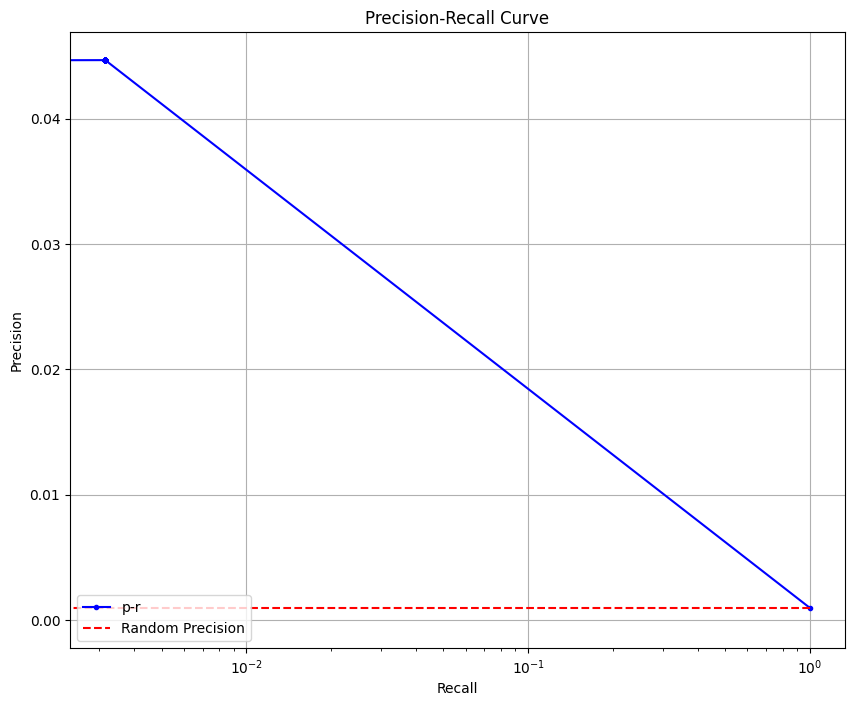

{'precision': 0.04466658231051499,
 'recall': 0.0031546023235031278,
 'rand_precision': 0.0009805828300419664,
 'auprc': 0.02282203589584146,
 'EPR': 3.2495463312943467}

In [14]:
#SROY
#OMNIPATH
BenGRN(sroy).compare_to(to="omnipath")

loading GT,  omnipath
intersection of 5727 genes
intersection pct: 0.6688076608665188


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


precision:  0.001522780666789853 
recall:  0.021875148125325875 
random precision: 0.0012862355421199006


 48%|████▊     | 48/99 [00:07<00:08,  6.24it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:18<00:00,  5.40it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0013904398079509109
EPR: 1.2537787690006579


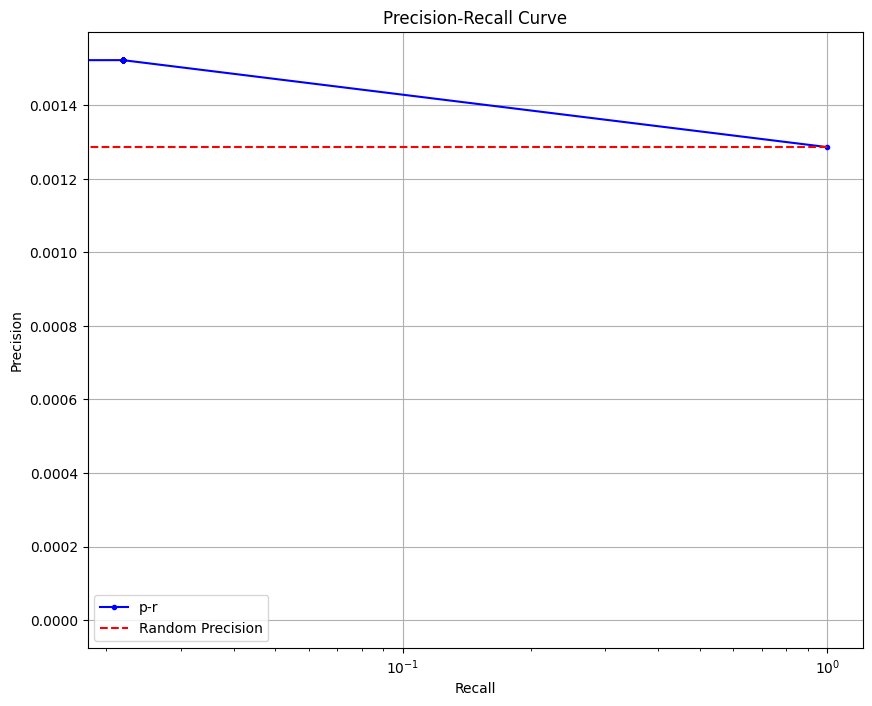

{'precision': 0.001522780666789853,
 'recall': 0.021875148125325875,
 'rand_precision': 0.0012862355421199006,
 'auprc': 0.0013904398079509109,
 'EPR': 1.2537787690006579}

In [3]:
#OMNIPATH
#GWPS
BenGRN(gwps).compare_to(to="omnipath")

In [15]:
gwps.var.ensembl_id = gwps.var.index
gwps.var.index = make_index_unique(gwps.var.gene_name.astype(str))


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:665: RuntimeWarning: divide by zero encountered in log10
  thresholds = np.logspace(np.log10(grn.min()), np.log10(grn.max()), 50)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


precision:  0.01108829568788501 
recall:  0.020785219399538105 
random precision: 0.00979697115964764


  0%|          | 0/99 [00:00<?, ?it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:00<00:00, 1061.81it/s]

Area Under Precision-Recall Curve (AUPRC):  0.010340817326264214
EPR: 0.7824397043431892


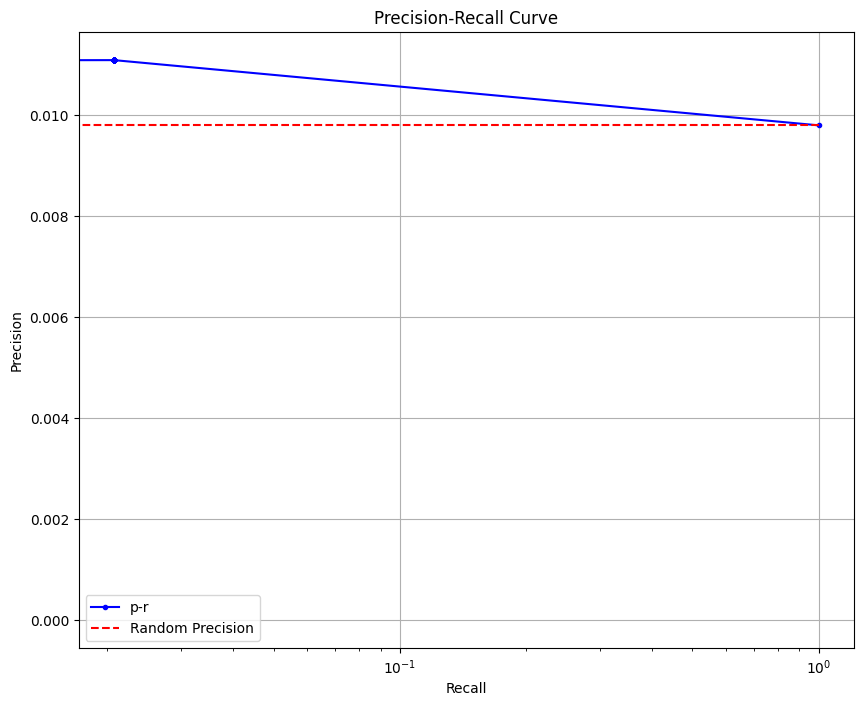

{'precision': 0.01108829568788501,
 'recall': 0.020785219399538105,
 'rand_precision': 0.00979697115964764,
 'auprc': 0.010340817326264214,
 'EPR': 0.7824397043431892}

In [16]:
#SROY
#GWPS
BenGRN(gwps).compare_to(sroy)